In [4]:
from lsa import *
import matplotlib.pyplot as plt
import csv
import os
import json
import time

In [5]:
data_dir = 'data'

In [6]:
data_files = [os.path.join(data_dir, f) for f in DATA_FILES]

In [7]:
df_data = load_data(data_files)

In [8]:
df_data

,title,author,url,content,id,publication
0,It’s Possible to Hack a Phone With Sound Waves...,John Markoff,NaN,SAN FRANCISCO — A security loophole that wo...,19284,New York Times
1,Politically Correct School Officials Reject ’G...,Tom Ciccotta,NaN,A report from The Baltimore Sun claims that Ba...,44077,Breitbart
2,"Clinton, Sanders use N.H. primary to frame lon...",Philip Rucker,https://web.archive.org/web/20160206013008/htt...,"CONCORD, N. H. — For the Democratic presi...",209714,Washington Post
3,The ambitious Democrat who can make Trump Univ...,Charles Gasparino,http://nypost.com/2016/03/08/the-ambitious-dem...,Add one more bizarre twist to the 2016 preside...,135930,New York Post
4,People Are Slamming Tribeca Film Festival For...,Susan Cheng,https://web.archive.org/web/20160325115729/htt...,Organizers for the upcoming 2016 Tribeca Film...,106460,Buzzfeed News
...,...,...,...,...,...,...
995,Autopsy shows Keith Lamont Scott had four guns...,Wesley Lowery,https://web.archive.org/web/20161013005231/htt...,Keith Lamont Scott was struck at least th...,215980,Washington Post
996,Scientists found bacteria inside rocks — here’...,The Cosmic Companion,https://thenextweb.com/syndication/2020/04/17/...,The discovery of bacteria inside rocks under t...,73470,The Next Web
997,"Little Richard, rock 'n' roll pioneer, has die...",NaN,https://www.cbsnews.com/news/little-richard-ro...,"Little Richard, one of the chief architects of...",73471,CBS NEWS
998,Silicon Valley’s favorite magician reimagines ...,Zachary Crockett,https://thehustle.co/silicon-valleys-favorite-...,"Daniel Chan has stumped billionaires, CEOs, a...",73472,The Hustle


In [9]:
df_words = preprocess_docs(df_data, use_lemmatizer=True, remove_numbers=False)
df_frequency = get_term_by_document_frequency(df_words)
df_reduced = reduce_terms(df_frequency, max_df=1, min_df=1, max_terms=0,
                          keep_less_freq=False)
df_tf_idf = get_tf_idf(df_reduced)

In [10]:
df_tf_idf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
world,0.006422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002478,...,NaN,0.003033,NaN,0.006916,NaN,NaN,NaN,NaN,0.004828,NaN
might,0.014997,NaN,NaN,0.006576,NaN,NaN,NaN,0.004741,0.00223,0.002893,...,NaN,0.003541,NaN,NaN,NaN,NaN,0.006773,NaN,NaN,NaN
hit,0.005052,NaN,NaN,0.004431,NaN,NaN,NaN,0.038332,NaN,0.003899,...,NaN,NaN,NaN,NaN,NaN,0.003945,NaN,0.016927,0.001899,NaN
possibility,0.015710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel,0.005823,NaN,0.003618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.004076,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hydrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.034146,NaN,NaN,0.009546,NaN,NaN,NaN
positioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.012380,0.009546,NaN,NaN,NaN
sleight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005958,0.026558
mentalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005958,0.026558


In [11]:
values = df_tf_idf.fillna(0).to_numpy()

In [12]:
U, s_eigen, V = np.linalg.svd(values, full_matrices=False)

In [13]:
s_eigen

array([4.61258766e+00, 1.50114044e+00, 1.37172267e+00, 1.10549001e+00,
       9.82912771e-01, 8.23216395e-01, 7.46916816e-01, 7.34193277e-01,
       7.24049995e-01, 7.22358218e-01, 7.03062639e-01, 6.93110004e-01,
       6.86111564e-01, 6.81578579e-01, 6.73516999e-01, 6.56020982e-01,
       6.45164888e-01, 6.33786970e-01, 6.23279110e-01, 6.13388795e-01,
       6.09703996e-01, 6.05411063e-01, 6.00982518e-01, 5.99377651e-01,
       5.96017227e-01, 5.95058011e-01, 5.90862759e-01, 5.88415241e-01,
       5.87939640e-01, 5.85846287e-01, 5.78359238e-01, 5.72945667e-01,
       5.68083262e-01, 5.65925266e-01, 5.59633843e-01, 5.58524994e-01,
       5.55259358e-01, 5.53006494e-01, 5.52138523e-01, 5.49451908e-01,
       5.46479685e-01, 5.45171658e-01, 5.37057273e-01, 5.35528938e-01,
       5.34135585e-01, 5.30934081e-01, 5.27338904e-01, 5.26578776e-01,
       5.23759568e-01, 5.22920514e-01, 5.20984826e-01, 5.18764724e-01,
       5.14274219e-01, 5.12760594e-01, 5.11265352e-01, 5.08808965e-01,
      

In [14]:
s_eigen[0]

4.612587655929179

In [15]:
s_eigen_norm = [x / s_eigen[0] for x in s_eigen]

In [16]:
s_eigen_norm

[1.0,
 0.3254443169067284,
 0.29738679795273226,
 0.2396680769925107,
 0.21309357016743172,
 0.17847170751063396,
 0.1619301078137753,
 0.15917166940911126,
 0.15697262557841857,
 0.1566058516865824,
 0.1524226078080265,
 0.15026489600263165,
 0.1487476477812512,
 0.147764905500366,
 0.1460171706209514,
 0.14222406830724438,
 0.13987048827666704,
 0.1374037779039349,
 0.13512569442428976,
 0.1329814933767715,
 0.1321826361608643,
 0.13125193669724958,
 0.13029183676520417,
 0.12994390465003436,
 0.1292153712787252,
 0.12900741514390476,
 0.12809789288494072,
 0.12756727564162668,
 0.1274641663360613,
 0.12701033141488002,
 0.12538715387819016,
 0.1242135021664992,
 0.12315934229232003,
 0.12269149297566724,
 0.12132752478736333,
 0.12108712845422137,
 0.12037914494983548,
 0.11989072842329458,
 0.11970255399972478,
 0.11912010121931552,
 0.11847572896906017,
 0.1181921512438321,
 0.11643296843338925,
 0.1161016284936824,
 0.11579955209344213,
 0.11510547244222885,
 0.11432604498281361,

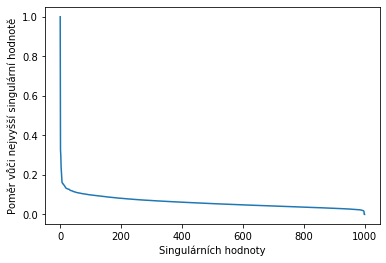

In [17]:
fig = plt.figure()
plt.plot(s_eigen_norm)
plt.xlabel('Singulárních hodnoty')
plt.ylabel('Poměr vůči nejvyšší singulární hodnotě')
fig.savefig('../report/images/singular_values.png')
plt.show()

In [111]:
df_concept_by_doc, df_query_projection = transform_to_concept_space(df_tf_idf, k=0, customSVD=False)

start = time.time()
best_match = get_n_nearest(df_tf_idf,df_concept_by_doc, df_query_projection, 999, n=10)
end = time.time()
time_seq = end - start
print("Čas vykonání dotazu při sekvenčním průchodu databází: " + str(time_seq) + " sekund")

Čas vykonání dotazu při sekvenčním průchodu databází: 0.18472576141357422 sekund


In [112]:
df_concept_by_doc, df_query_projection = transform_to_concept_space(df_tf_idf, k=400, customSVD=False)

start = time.time()
best_match = get_n_nearest(df_tf_idf,df_concept_by_doc, df_query_projection, 999, n=10)
end = time.time()
time_norm = end - start
print("Čas vykonání dotazu při průchodu databází pomocí LSI vektorového modelu: " + str(time_norm) + " sekund")

Čas vykonání dotazu při průchodu databází pomocí LSI vektorového modelu: 0.13696837425231934 sekund


In [113]:
print("Rozdíl: " + str(time_seq - time_norm))

Rozdíl: 0.04775738716125488
